Dataset loaded and split successfully.
Training data shape: (717, 13)
Testing data shape: (308, 13)

--- Decision Tree Classifier ---
Decision Tree Accuracy (before depth control): 0.9708


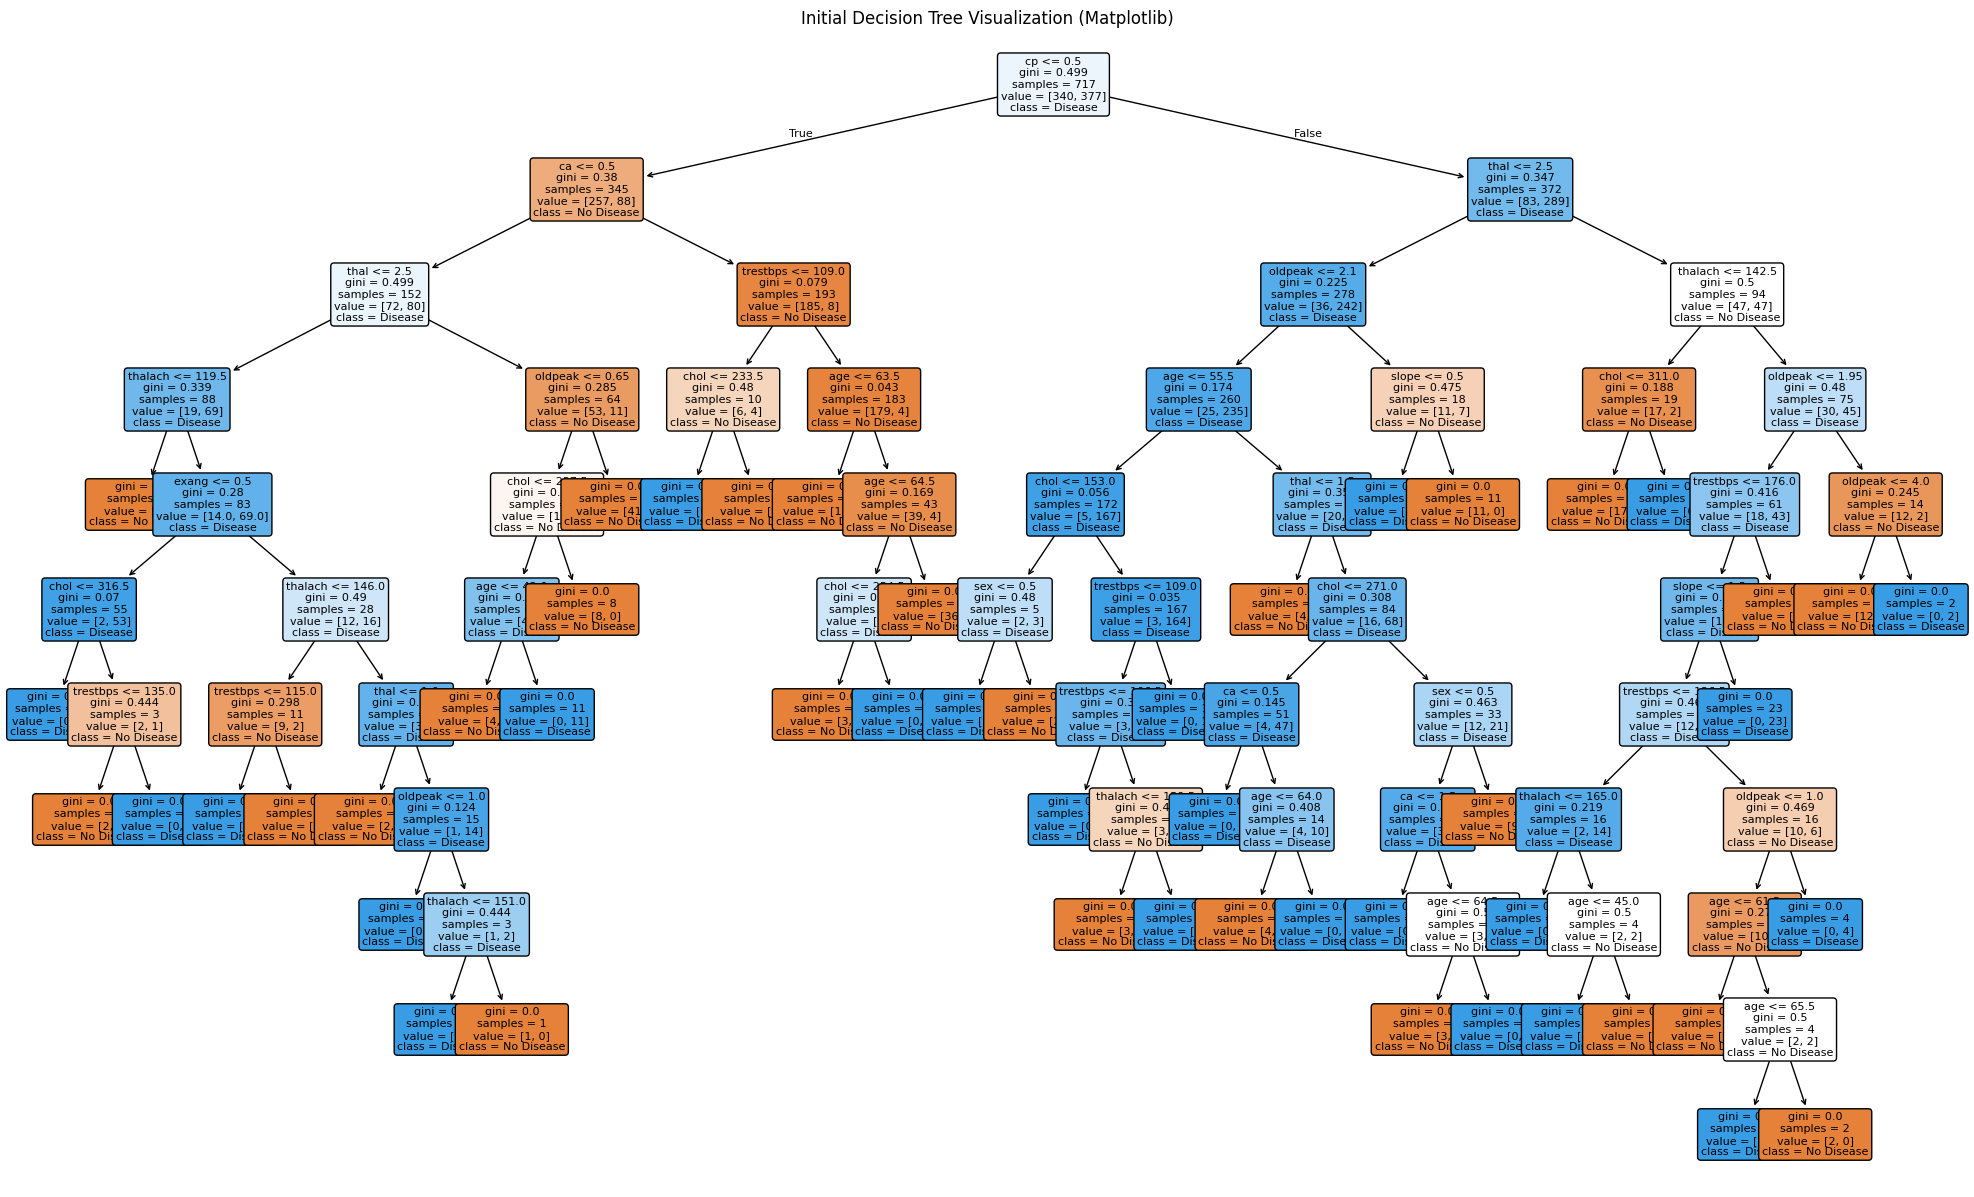

Initial Decision Tree visualization saved as 'decision_tree_initial_matplotlib.png'

--- Decision Tree Overfitting Analysis and Depth Control ---


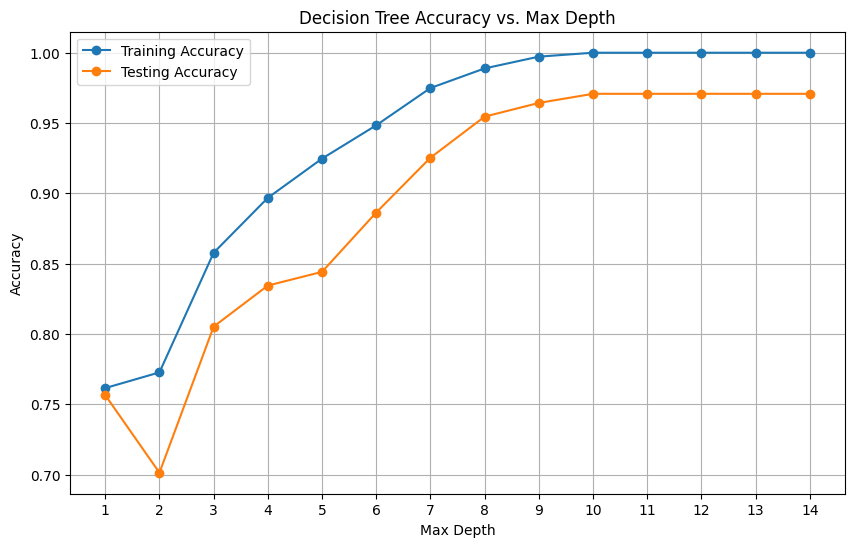

Decision Tree depth analysis plot saved as 'decision_tree_depth_analysis.png'
Optimal Decision Tree depth based on testing accuracy: 10
Decision Tree Accuracy (optimal depth=10): 0.9708


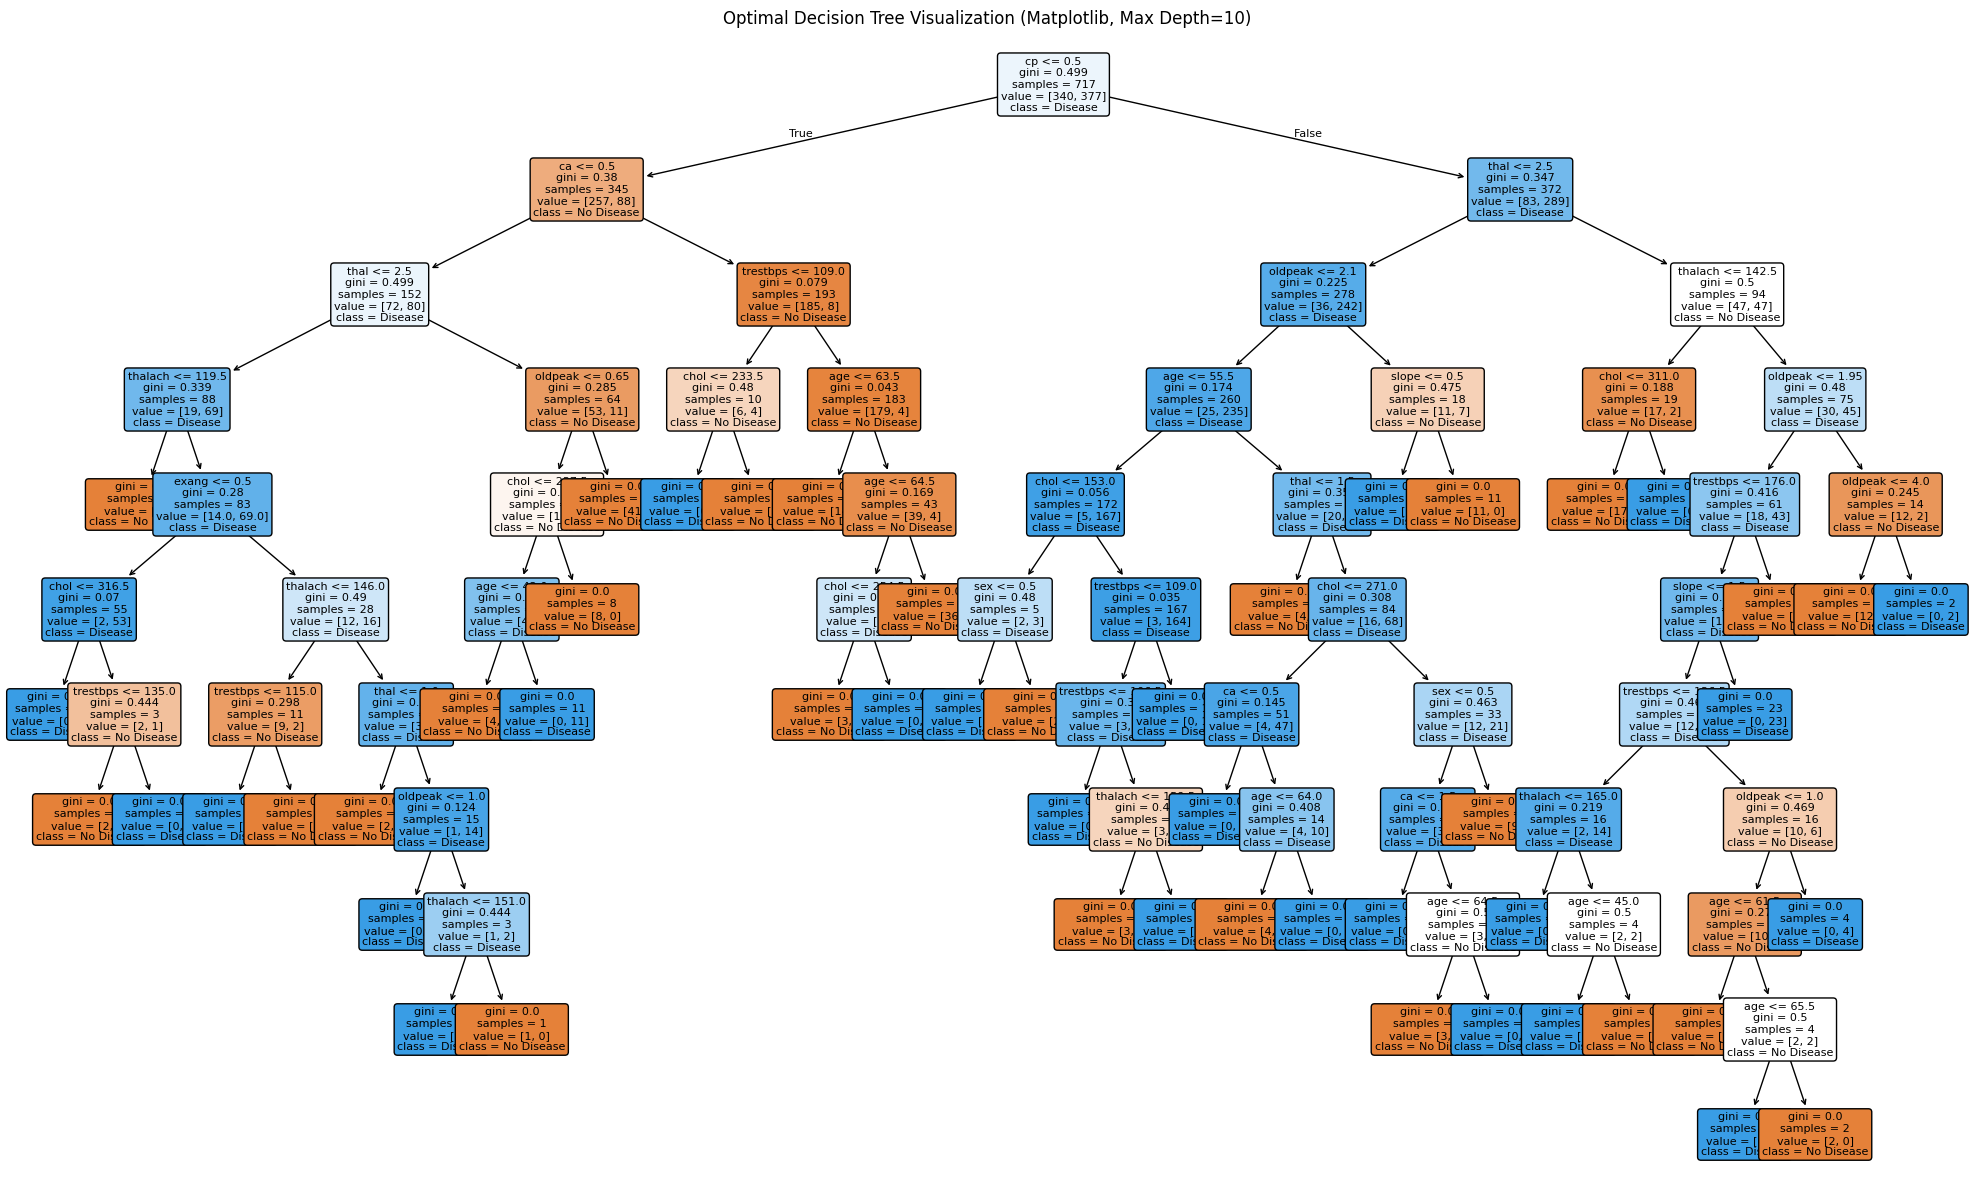

Optimal Decision Tree visualization saved as 'decision_tree_optimal_depth_10_matplotlib.png'

--- Random Forest Classifier ---
Random Forest Accuracy: 0.9805
Comparison: Random Forest (0.9805) vs. Optimal Decision Tree (0.9708)

--- Feature Importances (Random Forest) ---


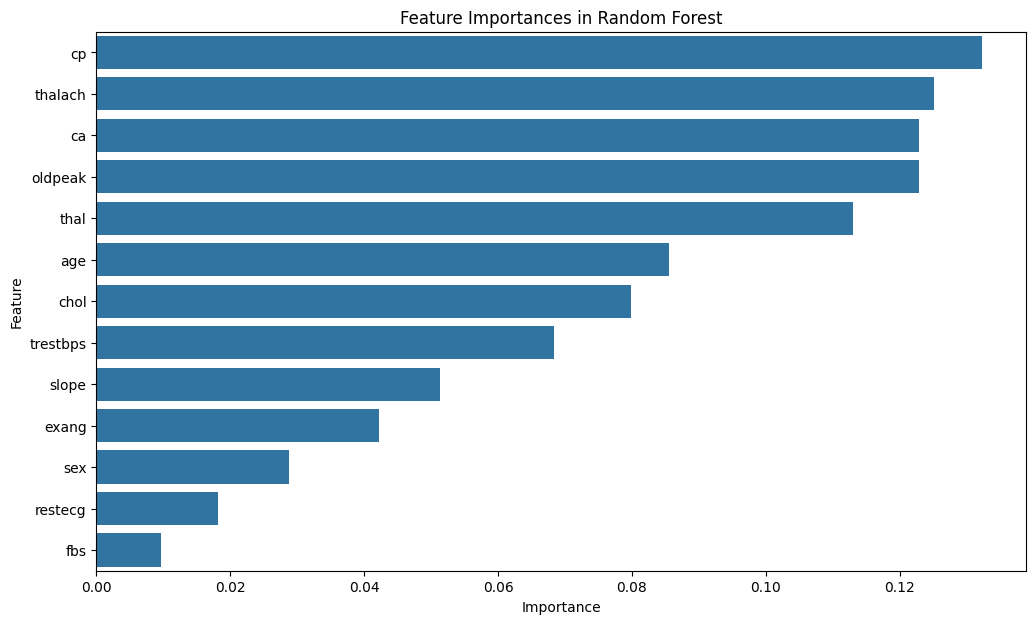

Random Forest Feature Importances plot saved as 'random_forest_feature_importances.png'

--- Cross-Validation Evaluation ---
Decision Tree Cross-Validation:
Decision Tree Cross-Validation Scores: [1. 1. 1. 1. 1.]
Decision Tree Mean CV Accuracy: 1.0000

Random Forest Cross-Validation:
Random Forest Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Random Forest Mean CV Accuracy: 0.9971

Task Completed!


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree # Changed export_graphviz to plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# import graphviz # No longer strictly needed if only using plot_tree for visualization
import os

# --- 1. Load the Dataset ---
try:
    df = pd.read_csv(r'D:\ML PROJECTS\elevate labs intenship\task 5\heart.csv')
except FileNotFoundError:
    print("Error: 'heart.csv' not found. Please download the dataset and place it in the same directory.")
    print("You can download it from the link provided in the task description.")
    exit()

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dataset loaded and split successfully.")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}\n")

# --- 2. Train a Decision Tree Classifier and visualize the tree ---
print("--- Decision Tree Classifier ---")
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test) # Corrected line from previous interaction
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy (before depth control): {accuracy_dt:.4f}")

# Visualize the Decision Tree using plot_tree (Matplotlib)
plt.figure(figsize=(25, 15)) # Adjust figure size for better readability
plot_tree(dt_classifier,
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True,
          rounded=True,
          fontsize=8) # Adjust font size if tree is too large
plt.title("Initial Decision Tree Visualization (Matplotlib)")
plt.savefig("decision_tree_initial_matplotlib.png")
plt.show()
print("Initial Decision Tree visualization saved as 'decision_tree_initial_matplotlib.png'")


# --- 3. Analyze overfitting and control tree depth ---
print("\n--- Decision Tree Overfitting Analysis and Depth Control ---")
train_accuracies = []
test_accuracies = []
depths = range(1, 15) # Explore depths from 1 to 14

for depth in depths:
    dt_controlled = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_controlled.fit(X_train, y_train)

    y_train_pred = dt_controlled.predict(X_train)
    y_test_pred = dt_controlled.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xticks(list(depths))
plt.legend()
plt.grid(True)
plt.savefig('decision_tree_depth_analysis.png')
plt.show()
print("Decision Tree depth analysis plot saved as 'decision_tree_depth_analysis.png'")

# Choose an optimal depth (e.g., where test accuracy plateaus or starts to drop)
max_test_accuracy = max(test_accuracies)
optimal_depth_index = test_accuracies.index(max_test_accuracy)
optimal_depth = depths[optimal_depth_index]

print(f"Optimal Decision Tree depth based on testing accuracy: {optimal_depth}")

dt_optimal = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
dt_optimal.fit(X_train, y_train)
y_pred_dt_optimal = dt_optimal.predict(X_test)
accuracy_dt_optimal = accuracy_score(y_test, y_pred_dt_optimal)
print(f"Decision Tree Accuracy (optimal depth={optimal_depth}): {accuracy_dt_optimal:.4f}")

# Visualize the optimal depth Decision Tree using plot_tree (Matplotlib)
plt.figure(figsize=(25, 15)) # Adjust figure size for better readability
plot_tree(dt_optimal,
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True,
          rounded=True,
          fontsize=8) # Adjust font size if tree is too large
plt.title(f"Optimal Decision Tree Visualization (Matplotlib, Max Depth={optimal_depth})")
plt.savefig(f"decision_tree_optimal_depth_{optimal_depth}_matplotlib.png")
plt.show()
print(f"Optimal Decision Tree visualization saved as 'decision_tree_optimal_depth_{optimal_depth}_matplotlib.png'")


# --- 4. Train a Random Forest and compare accuracy ---
print("\n--- Random Forest Classifier ---")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # 100 trees
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Comparison: Random Forest ({accuracy_rf:.4f}) vs. Optimal Decision Tree ({accuracy_dt_optimal:.4f})")

# --- 5. Interpret feature importances ---
print("\n--- Feature Importances (Random Forest) ---")
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('random_forest_feature_importances.png')
plt.show()
print("Random Forest Feature Importances plot saved as 'random_forest_feature_importances.png'")


# --- 6. Evaluate using cross-validation ---
print("\n--- Cross-Validation Evaluation ---")
print("Decision Tree Cross-Validation:")
dt_cv_scores = cross_val_score(dt_optimal, X, y, cv=5) # 5-fold cross-validation
print(f"Decision Tree Cross-Validation Scores: {dt_cv_scores}")
print(f"Decision Tree Mean CV Accuracy: {dt_cv_scores.mean():.4f}")

print("\nRandom Forest Cross-Validation:")
rf_cv_scores = cross_val_score(rf_classifier, X, y, cv=5) # 5-fold cross-validation
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Random Forest Mean CV Accuracy: {rf_cv_scores.mean():.4f}")

print("\nTask Completed!")